## 实验：读取、处理和写入图像

### 实验概要

现在，我们知道图像由像素组成。 像素可以被认为是非常小的正方形结构，当连接在一起时会生成图像。 它们是任何图像的最小组成部分。 让我们以图像为例。 下图由数百万种不同颜色的像素组成：

<img width="50%" src="./img/3.jpg">

让我们看看近距离看起来像什么像素。 当我们继续放大图像中女孩的眼睛时会发生什么？我们将得到如下所示的结果：

<img align="left" width="50%" src="./img/4.jfif"><img width="50%" src="./img/5.jfif">

如果您仔细查看前面的图像，您将能够在图像中看到一些正方形。这些被称为像素。 像素没有标准尺寸；它因设备而异。我们经常使用术语“每英寸像素数（PPI）”来定义图像的分辨率。图像的一英寸（或平方英寸）中更多的像素意味着更高的分辨率。因此，来自单反相机摄像头的图像每英寸具有更多的像素，而来自笔记本电脑网络摄像头的图像每英寸具有更少的像素。上面两幅图可以对比不同分辨率图像的对比。

现在，我们已经有了像素的基本概念以及诸如 PPI 和分辨率之类的术语，下面让我们了解像素的属性 —— 包括：**像素位置**和**像素颜色**。

#### 像素位置：图像坐标系

我们知道像素是正方形，是图像的最小组成部分。使用特定像素在图像中的位置进行引用。每个图像都有一个特定的坐标系。OpenCV 中遵循的标准是图像的左上角充当原点`（0,0）`。 当我们向右移动时，像素位置的 `X` 坐标增加，而当我们向下移动时，`Y` 坐标增加。

**很明显，这不是普遍遵循的坐标系，让我们暂时使用普通的坐标系。我们可以使用此坐标系找出像素的位置。**

<img width="80%" src="./img/6.jfif">

我们使用之前的图像，并添加了两个轴：`X` 轴和 `Y`  轴。`X`轴是水平轴，而 `Y` 轴是垂直轴。该坐标系的原点位于图像的左下角。有了这些信息，让我们找到上图中标记的三个点的坐标：橙色点（在左下方），绿色点（在图像中心）和蓝色点（在右上方）图片）。

我们知道橙色点位于图像的左下角，这恰好是图像坐标系的原点所在的位置。因此，左下角像素的坐标为`（0,0）`。

蓝点呢？假设图像的宽度为 `W`，图像的高度为 `H`。这样做，我们可以看到蓝点的 `X` 坐标为图像的宽度（W），而 `Y` 坐标为将是图像的高度（H）。因此，右上角像素的坐标为`（W，H）`。

现在，让我们考虑中心点（黑点）的坐标。中心的 X 坐标将为 `W/2`，而点的 Y 坐标将为 `H/2`。因此，中心像素的坐标为`（W/2，H/2）`。

因此，现在我们知道了如何找到像素的位置。我们可以使用此信息来提取有关特定像素或一组像素的信息。与像素相关的另一个属性就是像素的颜色。但是，在我们研究它之前，让我们先看一下图像的属性。

#### 图像属性

现在，我们对图像和像素有了一个直观的了解。让我们了解图像的属性。从上图中，我们可以看到图像的三个主要属性：

- **图像尺寸**
- **色彩空间**
- **图像通道数** 

让我们详细研究每个属性。

##### 图像尺寸

图像的大小由其高度和宽度表示。引用图像的宽度和高度的方法有很多种。譬如，你在之前填写的申请表格中，很多时候他们会要求你提供尺寸为 `小一寸` 的证件照。这意味着图像的宽度将为 `2.2` 厘米，图像的高度将为 `3.2` 厘米。但是，当您尝试从诸如图片分享网站下载图像时，会得到以下选项：

![](./img/7.jfif)

那么，这是什么意思？ 这些数字是厘米还是毫米，还是其他单位？实际上，这些数字以像素为单位。这些数字表示图像中存在的像素数。因此，尺寸为 `1920×1221` 的图像将总共具有 `1920×1221 = 2334420` 像素。这些数字有时也与图像的分辨率有关。图像中的像素数越多，则意味着图像具有更多的细节，换句话说，我们可以在不损失其细节的情况下进一步放大图像。

您可以尝试找出何时需要使用哪种图像尺寸表示形式吗？当您打印出护照尺寸的照片以便可以将其粘贴到表格中的框框中时，您会更加担心图像的大小（以厘米为单位）。因为您希望图像适合框框。由于我们在谈论物理世界，因此尺寸也以物理单位表示，例如：`厘米，英寸或毫米`。然而在电脑中处理数字图像时，情况则不一样 —— 

![](./img/8.jfif)

上面两个图像的物理尺寸都相同：高度为 `2.3` 英寸，宽度为 `3.6` 英寸。那么，它们是相同的图像吗？答案是不。与右边的图像相比，左边的图像具有更多的像素。当您更专注于图像的细节（或分辨率）而不是图像的物理尺寸时，这种差异就很明显。

例如，与帖子或评论一起查看时，微博上每个用户的个人资料照片都具有相同的尺寸。但这并不意味着每个图像都具有相同的 `清晰度/分辨率/细节`。请注意，我们在这里是如何使用三个词（清晰度，分辨率和细节）来传达相同的感觉，即：**图像的质量**。与像素数较少的相同图像相比，像素数较高的图像的质量要好得多。

由于我们正在处理数字图像，因此，在后面的实验中将统一约定 —— **使用图像中的像素数来表示图像的大小**。

##### 颜色空间和通道

当人类观察彩色图片时，我们都会在看三种类型的颜色或属性。但是，这三种颜色或属性是什么？考虑下面给出的两个图像。它们看上去很不一样，但有趣的是它们实际上只是同一图像的两个不同版本。不同之处在于它们代表的色彩空间。让我们以一个类比来理解它。我们有一张木椅。现在使用的木材可以不同，但椅子仍然是一样的。好比图像是相同的，只是颜色空间不同。让我们详细了解一下。在这里，我们有两个图像：

![](./img/9.jfif)

左图使用 `红色`**（red）**，`绿色`**（green）**和 `蓝色`**（blue）** 作为三个属性，从而使其色彩空间成为 `RGB` 颜色空间，而左图使用 `色相`**（hue）**，`饱和度`**（saturation）** 和 `明度`**（value）** 作为三个属性，从而使其色彩空间 `HSV` 颜色空间。您可能会想 ——

> 为什么我们需要不同的色彩空间？

由于不同的颜色空间使用不同的属性，根据我们要解决的问题，我们可以使用专注于特定属性的颜色空间。 让我们看一个例子：

![](./img/10.jfif)

在上图中，我们分离了构成图像颜色空间的三个属性：红色，绿色和蓝色。这些属性也称为：通道。因此，RGB 颜色空间具有三个通道：

- **红色通道**
- **绿色通道**
- **蓝色通道**

我们很快就会理解为什么这些图像都是灰度的。

同样，让我们考虑一下 HSV 颜色空间的三个通道：**色相**，**饱和度** 和**明度**：

![](./img/11.jfif)

假设我们要检测图像中存在的边缘。您可以看到 HSV 图像的饱和度通道已经突出了很多边缘。因此，即使我们不进行任何处理并继续使用 HSV 图像的饱和度通道，我们也将有了一个不错的结果。这正是我们需要色彩空间的原因。当我们只想看到图像并欣赏时，RGB 颜色空间比 HSV 颜色空间要好得多。但是，当我们要检测边缘时，HSV 颜色空间要好于 RGB 颜色空间。同样，这不是通用的定律，取决于我们所要处理的图像。

有时，HSV 颜色空间优于 RGB 颜色空间。其背后的原因是 RGB 颜色空间中的红色，绿色和蓝色分量（或通道）之间具有很高的相关性。另一方面，HSV 色彩空间使我们能够完全分离图像的明度通道，这有助于我们处理图像。考虑对象检测的情况，您要检测图像中存在的对象。您将要确保存在光不变性，这意味着无论图像是暗还是亮，都可以检测到物体。由于 HSV 颜色空间使我们能够分隔明度或强度通道，因此最好将它应用到对象检测案例当中。

**要注意，我们有各种各样的色彩空间。 RGB 和 HSV 只是其中的两个。**

让我们看一下另一个颜色空间：`灰度`。当图像只有一个通道时，我们说它处于 `灰度模式`。这是因为像素的颜色变成取决于像素值灰色阴影。像素值 `0` 表示黑色，而像素值 `255` 表示白色。当我们将 RGB 和 HSV 图像分为三个通道时，剩下的图像每个只有一个通道，这就是为什么将它们转换为灰度并以这种灰色阴影进行着色的原因。

![](./img/12.jfif)

#### 像素值

到目前为止，我们已经讨论了什么是像素及其属性。我们学习了如何使用图像坐标系来表示像素的位置。现在，我们将学习如何表示像素值。

首先，像素值是什么意思？ 像素的值不过是该像素中存在的颜色而已。在此必须注意：**每个像素只能具有一种颜色，这就是像素值是固定值的原因。**

如果我们谈论的是灰度图像，则像素值的范围可以在 `0` 到 `255` 之间，其中 `0` 代表黑色，`255` 代表白色。

在下图中，有两个轴：X 和 Y。这两个轴分别代表图像的宽度和高度，在计算机视觉领域没有太大的意义。相反，重要的是要专注于图像中的像素值。

![](./img/13.jfif)

现在，我们知道灰度图像只有一个通道，这就是为什么像素值只有一个数字可以确定该像素中存在的颜色阴影的原因。如果我们谈论的是 RGB 图像怎么办？由于 RGB 图像具有三个通道，每个像素将具有三个值：一个值用于红色通道，一个值用于绿色通道，一个值用于蓝色通道。请考虑以下图像，该图像显示 RGB 图像（在左侧）由三个图像或通道组成：一个红色通道，一个绿色通道和一个蓝色通道：

![](./img/14.jfif)

我们看到每个通道图像看起来都完全像一个灰度图像。这就是每个通道的像素值在 0 到 255 之间的原因。如果我们假设以下图像的红色通道，具有上图相同的像素值，而其他两个通道为零，将会发生什么？ 让我们看一下结果：

<img src="./img/15.jfif" width="50%">

请注意，红色通道的 `0` 表示如何在该像素中没有红色。类似地，红色通道的 `255` 像素值表示该像素中将有 `100％` 红色。所谓 `100％` 红色，是指它不会是某种较深的红色，而是纯的（最浅的）红色。下面分别显示了带有绿色和蓝色通道的 RGB 图像。与上面所示的相同，在每种情况下，我们假设其他两个通道为零。这样，我们突出显示了仅一个通道的效果：

<img src="./img/16.jfif" width="50%">

仅有蓝色通道的输出如下：

<img src="./img/17.jfif" width="50%">

现在，如果我们将蓝色和绿色框架组合在一起并将红色框架设置为 `0`，将会发生什么？

<img src="./img/18.jfif" width="50%">

请注意，蓝色和绿色通道如何合并以创建青色阴影。 当蓝色和绿色结合在一起时，您可以在下图中看到相同的效果：

<img src="./img/19.jfif" width="80%">

在本节中，我们讨论了灰度图像和具有三个通道的图像的像素值的概念。我们还看到了像素值如何影响特定像素中存在的颜色的阴影。

#### OpenCV 概要（4.2.0）

`OpenCV`，也称为开源计算机视觉库，是最常用的计算机视觉库。它主要是用 C++ 编写的，然而，由于它的 Python 封装器，也经常用在 Python 中。多年来，OpenCV 经过了多次修订，我们将使用的版本为`4.2.0`。它与其他计算机视觉库的不同之处在于它易于使用且易于操作，它为 QT 和 OpenGL 等库提供支持，最重要的是，它为 Intel 处理器提供了硬件加速。这些强大的功能/优点使 OpenCV 成为理解和实现计算机视觉的各种概念的理想选择。除了OpenCV，我们还将在需要时使用 `NumPy` 进行一些基本计算，并使用 `Matplotlib` 进行可视化。

下面，我们从了解如何在 Python 的 OpenCV 中表示图像开始。

#### OpenCV 图像表示形式

现在，我们已经知道，图像不过是一个矩阵。每个图像都有其尺寸特有的三个属性：宽度，高度和通道数。图像的每个通道都是位于 `0` 到 `255` 之间的像素值的集合。因此，图像成为彼此堆叠的 2D 矩阵的集合。

![](./img/20.jfif)

快速复习一下，在 Python 中使用 OpenCV 时，图像表示为 NumPy 数组。 NumPy 是通常用于数值计算的 Python 模块。正如在之前的实验中中看到的那样，NumPy 数组看起来像是 2D 矩阵。这就是 RGB 图像（具有三个通道）看起来像三个彼此堆叠的 2D NumPy 阵列的原因。到目前为止，我们的讨论只限于 2D 阵列（对于灰度图像已经足够了），但是我们知道 RGB 图像与 2D 阵列不同。它们不仅具有高度和宽度，它们还有一个额外的维度：图像中的通道数。这就是为什么我们可以将 RGB 图像称为 3D 阵列的原因。

与我们在前面讨论的命令的唯一区别在于，我们现在必须为 NumPy 数组的形状添加一个额外的维度：`通道数`。由于我们知道 RGB 图像只有三个通道，因此 NumPy 数组的形状变为：**（行数，列数，3）**。

现在我们知道了图像在 OpenCV中 的表示方式，在正式开始实验前，让我们继续学习一些我们通常会使用的 OpenCV 函数。

#### OpenCV 常用函数

我们可以将 OpenCV 函数分为以下几类：

- **读取图像函数**
- **修改图像函数**
- **显示影像函数**
- **保存图像函数**

##### 读取图像函数

我们要使用的唯一函数是 `cv2.imread`。 此函数采用以下参数：

- 我们要读取/加载的图像的文件名
- 用于指定我们要以哪种模式读取图像的标志

如果我们尝试加载不存在的图像，该函数将返回无（`None`）。这可以用来检查图像是否被成功读取。目前，OpenCV 支持 `.bmp`，`.jpeg`，`.jpg`，`.png`，`.tiff` 和 `.tif` 等格式的图像。详细的列表可以：[参考官方文档](https://docs.opencv.org/4.2.0/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)。

通常，只有三个标志用于在指定模式下读取图像：

- **cv2.IMREAD_UNCHANGED**：照原样读取图像。这意味着，如果图像是具有透明背景的 PNG 图像，则它将被读取为 BGRA 图像，其中 `A` 指定 `Alpha` 通道：负责透明度。 如果不使用此标志，则该图像将作为 `BGR` 图像读取。请注意，`BGR` 是指图像的蓝色，绿色和红色通道。`A`（或 `Alpha` 通道）负责透明度。这就是为什么具有透明背景的图像将被读取为 `BGRA` 而不是 `BGR`。 同样需要注意的是，默认情况下，OpenCV 使用 `BGR` 模式，这就是我们在这里讨论 `BGRA` 模式而不是 `RGBA` 模式的原因。
- **cv2.IMREAD_GRAYSCALE**：以灰度格式读取图像，这会将任何彩色图像转换为灰度图像。
- **cv2.IMREAD_COLOR**：默认标志，它将任何图像读取为彩色图像（`BGR` 模式）。

请注意，OpenCV 以 `BGR` 模式而不是 `RGB` 模式读取图像。这意味着通道的顺序变为蓝色，绿色和红色。 即使我们将使用其他 OpenCV 函数，也假定图像处于 `BGR` 模式。

##### 修改图像函数

接下来，让我们看一下可以用来修改图像的一些函数，我们将专门讨论以下任务的函数：

- 转换图像的色彩空间
- 将图像分成多个通道
- 合并通道以形成图像

转换图像的色彩空间将使用 `cv2.cvtColor` 函数，此函数有两个输入元素：

- 要转换的图像
- 颜色转换标志，如下所示：
`cv2.COLOR_{CURRENT_COLOR_SPACE}2{NEW_COLOR_SPACE}`

例如，要将 `BGR` 图像转换为 `HSV` 图像，将使用 `cv2.COLOR_BGR2HSV`。 要将 `BGR` 图像转换为 `灰度` 图像，将使用：`cv2.COLOR_BGR2GRAY`，依此类推。详细的列表可以：[参考官方文档](https://docs.opencv.org/4.2.0/d8/d01/group__imgproc__color__conversions.html)

拆分和合并渠道。假设您只想修改图像的红色通道，您可以先拆分三个通道（蓝色，绿色和红色），修改红色通道，然后再次合并三个通道。让我们看看如何使用 OpenCV 函数拆分和合并通道：

- 分割通道，可以使用 `cv2.split` 函数。 它仅需一个参数：要分割的图像，并返回三个通道的列表：蓝色，绿色和红色。
- 合并通道，可以使用 `cv2.merge` 函数。 它仅接受一个参数：一个由三个通道（蓝色，绿色和红色）组成的集合，并返回合并的图像。

##### 显示影像函数

我们将使用三个主要函数来进行显示：

- 显示图像，使用 `cv2.imshow` 函数。它有两个参数。第一个参数是一个字符串，它是我们将在其中显示图像的窗口的名称。第二个参数是我们要显示的图像。
- 保持时间，调用 `cv2.imshow` 函数后，我们使用 `cv2.waitKey` 函数。此函数指定控件应在窗口上停留多长时间。如果要在用户按下任意键后，才执行下一段代码，则可以提供 `0`。否则，可以提供一个数字，该数字指定程序在移至下一段代码之前将等待的毫秒数。例如，如果要等待 `10` 毫秒才能执行下一段代码，则可以使用`cv2.waitKey(10)`。
- 关闭窗口，如果不调用 `cv2.waitKey` 函数，则窗口将无法正确显示。但是，运行下一个代码后，该窗口仍将保持打开状态，要关闭所有显示窗口，我们可以使用 `cv2.destroyAllWindows()` 函数。它不带任何参数。建议不再使用显示窗口时将其关闭。

##### 保存图像函数

最后，要保存图像，我们将使用 OpenCV 的 `cv2.imwrite` 函数。它有两个参数：

- 一个字符串，指定我们要用于保存图像的文件名
- 我们要保存的图像

### 实验目标

在本实验中，我们将使用上面介绍的 OpenCV 函数，加载开篇的《小女孩与狮子图像》，分离`红色`，`绿色`和`蓝色`通道，并且分别显示，最后将这三个通道保存到磁盘中。

### 1. 导入 OpenCV 库

In [2]:
import cv2 # 导入OpenCV库

### 2. 读取图像

读取目标图像，该图像路径是：`./data/lion.jpg`，在继续之前，请确保您可以根据图像在系统中的保存位置来更改图像的路径。

In [13]:
# 设置输入输出路径
import os
# "BASE_PATH" 可以理解为预设的基本路径吗
base_path = os.environ.get("BASE_PATH",'../data/')
print(base_path)
data_path = os.path.join(base_path + "lab1/")
result_path = "result/"
os.makedirs(result_path, exist_ok=True)

# 读取图像
# imread(传入图片路径)
img = cv2.imread("./data/lion.jpg")

../data/


In [14]:
# 通过检查读取图像函数是否返回None，来检查是否已成功读取图像：
if img is None:
    print("Image not found")
else:
    print("Image load success")

Image load success


### 3. 显示读取到的图像

**请注意，每当我们要使用 `cv2.imshow` 函数显示图像时，都会弹出一个新的显示窗口。该输出在 Jupyter Notebook 中不可见，并将显示在单独的窗口中，如下图所示。**

<img src="./img/21.jfif" width="50%">

**然而,在我们的实验环境中， Jupyter Notebook 在容器环境中运行，会造成 Kernel 崩溃，因此，这里我们使用 Matplotlib 库来取代 `cv2.imshow`，让图像嵌入到 Jupyter Notebook 中显示** 。如果你在自己的电脑上进行实验，可以直接使用 `cv2.imshow` 函数。以下实验操作均按此约定执行。

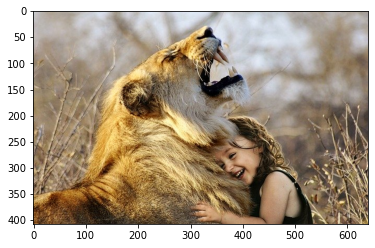

In [15]:
# 显示读取到的图像
# cv2.imshow("Lion",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 加载matplotlib.pyplot进行图像显示
import matplotlib.pyplot as plt                       
# 将图像转换为 RGB 模式显示
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))       

# 显示图像
plt.show()              

### 4. 分割通道

我们将图像分为三个通道：蓝色，绿色和红色：

In [39]:
# 分割图像通道 (input BGR)
print(img)
print("------")
# blue,green,red = cv2.split(img)
blue, green, red = cv2.split(img)
print(blue)


[[[219 208 204]
  [215 206 202]
  [211 204 201]
  ...
  [147 157 164]
  [145 155 162]
  [143 153 160]]

 [[218 207 203]
  [215 206 202]
  [211 204 201]
  ...
  [149 159 166]
  [151 159 166]
  [147 157 164]]

 [[215 206 203]
  [212 205 202]
  [208 203 202]
  ...
  [153 161 168]
  [155 161 168]
  [152 160 167]]

 ...

 [[ 29  65 111]
  [  0  37  82]
  [  5  48  97]
  ...
  [ 65 130 158]
  [ 46 111 139]
  [113 180 207]]

 [[ 41  77 123]
  [  0  25  70]
  [  5  48  97]
  ...
  [ 76 143 170]
  [ 42 109 136]
  [ 85 152 179]]

 [[ 29  65 111]
  [ 44  83 128]
  [ 68 111 160]
  ...
  [ 70 139 166]
  [ 60 129 156]
  [ 65 134 161]]]
------
[[219 215 211 ... 147 145 143]
 [218 215 211 ... 149 151 147]
 [215 212 208 ... 153 155 152]
 ...
 [ 29   0   5 ...  65  46 113]
 [ 41   0   5 ...  76  42  85]
 [ 29  44  68 ...  70  60  65]]


接下来，显示在上一步中获得的通道，我们从显示蓝色通道开始：

[[219 215 211 ... 147 145 143]
 [218 215 211 ... 149 151 147]
 [215 212 208 ... 153 155 152]
 ...
 [ 29   0   5 ...  65  46 113]
 [ 41   0   5 ...  76  42  85]
 [ 29  44  68 ...  70  60  65]]


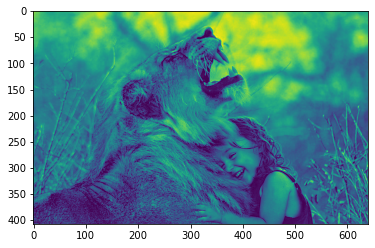

In [56]:
#cv2.imshow("Blue",blue)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# 将图像转换为 RGB 模式显示
print(blue)
# plt.imshow(cv2.cvtColor("blue")       
plt.imshow(blue)
# 显示图像
plt.show()

显示绿色通道：

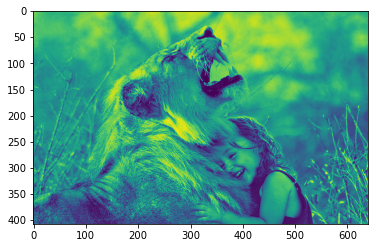

In [23]:
#cv2.imshow("Green",green)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# 将图像转换为 RGB 模式显示
plt.imshow(green)       

# 显示图像
plt.show()

显示红色通道：

[[204 202 201 ... 164 162 160]
 [203 202 201 ... 166 166 164]
 [203 202 202 ... 168 168 167]
 ...
 [111  82  97 ... 158 139 207]
 [123  70  97 ... 170 136 179]
 [111 128 160 ... 166 156 161]]


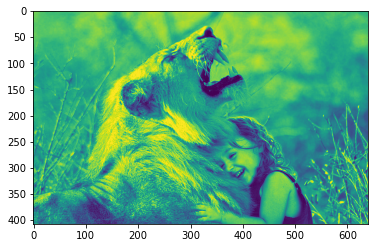

In [25]:
#cv2.imshow("Red",red)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# 将图像转换为 RGB 模式显示
plt.imshow(red)       
print(red)
# 显示图像
plt.show()

(5, 4, 3)
(5, 4)


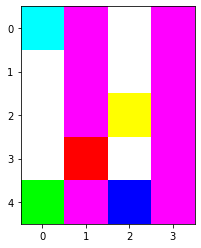

In [49]:
#test
import numpy as np
tes_img =[[[0,255,255],[255,0,255],[255,255,255],[255,0,255]],
          [[255,255,255],[255,0,255],[255,255,255],[255,0,255]],
          [[255,255,255],[255,0,255],[255,255,0],[255,0,255]],
          [[255,255,255],[255,0,0],[255,255,255],[255,0,255]],
          [[0,255,0],[255,0,255],[0,0,255],[255,0,255]]]
blue_split = [[0,255,255,255],[255,255,255,255],[255,255,255,255],[255,255,255,255],[0,255,0,255]]
tes_img = np.array(tes_img)
blue_split = np.array(blue_split)
print(tes_img.shape)
print(blue_split.shape)
plt.imshow(tes_img)

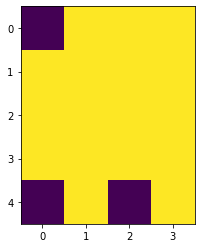

In [51]:
plt.imshow(blue_split)

### 5. 保存图像

最后，为了保存我们获得的三个通道，我们将使用 `cv2.imwrite` 函数。这将返回 `True`。这表明图像已成功写入/保存在磁盘上。此时，您可以在本地目录中找到这几个文件，验证所获得的三个通道是否与此处显示的图像匹配：

![](./img/22.jfif)

In [52]:
# 保存蓝色通道图像为Blue.png文件
cv2.imwrite(result_path+"Blue.png",blue)          
# 保存绿色通道图像为Green.png文件
cv2.imwrite(result_path+"Green.png",green)        
# 保存红色通道图像为Red.png文件
cv2.imwrite(result_path+"Red.png",red)            

True

### 实验小结

在本实验中，我们看到了如何使用 OpenCV 的基本函数，对图像进行读取、修改、显示和保存。